<a href="https://colab.research.google.com/github/kvan493/BART_project/blob/master/BART_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bay Area Rapid Transport project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Importing station info

In [2]:
#Importing station dataframe
station_df = pd.read_csv('station_info.csv')
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Abbreviation  46 non-null     object
 1   Description   46 non-null     object
 2   Location      46 non-null     object
 3   Name          46 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


In [3]:
station_df.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)


## Importing 2016 BART data

In [4]:
#Importing BART 2016 dataframe
df_2016 = pd.read_csv('date-hour-soo-dest-2016.csv')
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9971582 entries, 0 to 9971581
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Origin       object
 1   Destination  object
 2   Throughput   int64 
 3   DateTime     object
dtypes: int64(1), object(3)
memory usage: 304.3+ MB


In [5]:
df_2016.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


## Importing 2017 BART data

In [6]:
#Importing BART 2017 dataframe
df_2017 = pd.read_csv('date-hour-soo-dest-2017.csv')
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313625 entries, 0 to 3313624
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Origin       object
 1   Destination  object
 2   Throughput   int64 
 3   DateTime     object
dtypes: int64(1), object(3)
memory usage: 101.1+ MB


In [7]:
df_2017.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


### Combining 2016 and 2017 BART data into one dataframe

In [8]:
#Append BART 2016 and 2017 dataframe
df = df_2016.append(df_2017, ignore_index = True)
df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13285207 entries, 0 to 13285206
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Origin       object
 1   Destination  object
 2   Throughput   int64 
 3   DateTime     object
dtypes: int64(1), object(3)
memory usage: 405.4+ MB


In [10]:
#Changing dtype for DateTime attribute from object to actual datetime
df['DateTime'] = pd.to_datetime(df['DateTime'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
station_df.head(2)

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)


In [12]:
#Removing <br /> from Description attribute
station_df['Description'].replace('(<br />)', ' ', regex = True, inplace = True)
station_df.head()

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612 12th St. Oakla...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110 ""T...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612 19th Street St...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110 ""T...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703 Ashby S...","-122.270062,37.852803,0",Ashby (ASHB)


In [13]:
#Viewing the first two Description in full
print(station_df['Description'][0])
print(station_df['Description'][1])

1245 Broadway, Oakland CA 94612 12th St. Oakland City Center Station is in the heart of Downtown Oakland, near historic Old Oakland and Oakland's Chinatown.
2000 Mission Street, San Francisco CA 94110 "The Mission" refers to the San Francisco de Asis Mission, also known as Mission Dolores, which was founded 1776. Today the neighborhood is host to an eclectic mix of restaurants, markets, performance spaces, shops, and nightspots.


In [14]:
#Creating new attribute called City 
station_df['City'] = station_df['Description'].apply(lambda x: x.split(',')[1])
station_df['City'].replace('CA(.*)$', '', regex = True, inplace = True)
station_df['City'].unique()

array([' Oakland ', ' San Francisco ', ' Berkeley ', ' San Leandro ',
       ' Castro Valley ', ' Colma ', ' Concord ', ' Daly City ',
       ' El Cerrito ', ' Pleasanton ', ' Fremont ', ' Hayward ',
       ' Lafayette ', ' Millbrae ', ' Orinda ', ' Walnut Creek ',
       ' Pittsburg ', ' Richmond ', ' San Bruno ', ' Level 3',
       ' South San Francisco ', ' Union City ', ' Fremont', ' Dublin '],
      dtype=object)

In [15]:
#Checking out Level 3
station_df[station_df['City'] == ' Level 3']

,Abbreviation,Description,Location,Name,City
38,SFIA,"International Terminal, Level 3, San Francisco...","-122.392409,37.615966,0",San Francisco Int'l Airport (SFIA),Level 3


In [16]:
#Changing City from Level 3 to San Francsisco
station_df['City'].replace(' Level 3', ' San Francisco ', inplace = True)

In [17]:
#Separating attribute Location into attributes for longitude and latitude
station_df['Latitude'] = station_df['Location'].apply(lambda x: x.split(',')[0])
station_df['Longitude'] = station_df['Location'].apply(lambda x: x.split(',')[1])

### Merging station dataframe with main dataframe

In [18]:
#Renaming station dataframe columns to distinguish Origin station info prior to merging to main dataframe
origin_df = station_df[['Abbreviation','Name', 'Latitude', 'Longitude', 'City']]
origin_df = origin_df.rename(columns = {'Abbreviation': 'Origin', 
                                        'Name': 'Ori_Name', 
                                        'Latitude': 'Ori_Latitude', 
                                        'Longitude': 'Ori_Longitude', 
                                        'City': 'Ori_City'})

In [19]:
#Renaming Abbreviation, Location and Name columns in order to distinguish Destination stations prior to merging station 
#dataframe with the main dataframe
dest_df = station_df[['Abbreviation','Name', 'Latitude', 'Longitude', 'City']]
dest_df = dest_df.rename(columns = {'Abbreviation': 'Destination', 
                                    'Name': 'Dest_Name', 
                                    'Latitude': 'Dest_Latitude', 
                                    'Longitude': 'Dest_Longitude', 
                                    'City' : 'Dest_ City'})

In [20]:
#Checking to see if all Origin and Destination locations match those in station dataframe
print(set(df["Origin"].unique()).difference(station_df["Abbreviation"]))
print(set(df["Destination"].unique()).difference(station_df["Abbreviation"]))

{'WSPR'}
{'WSPR'}


In [21]:
#Checking station abbreviation not used in 2016 and 2017 dataframe
print(set(station_df["Abbreviation"].unique()).difference(df["Origin"]))

{'WARM'}


In [22]:
#Listing out all station abbreviation 
station_df['Abbreviation'].unique()

array(['12TH', '16TH', '19TH', '24TH', 'ASHB', 'BALB', 'BAYF', 'CAST',
       'CIVC', 'COLS', 'COLM', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL',
       'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR',
       'MLBR', 'MONT', 'NBRK', 'NCON', 'OAKL', 'ORIN', 'PHIL', 'PITT',
       'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY',
       'SSAN', 'UCTY', 'WARM', 'WCRK', 'WDUB', 'WOAK'], dtype=object)

According to the station dataframe, there is not station with the abbreviation "WSPR" that was recorded in the 2016 and 2017 dataframes. When I crosschecked the stations and their abbreviation with the BART's website: https://www.bart.gov/stations & https://api.bart.gov/docs/overview/abbrev.aspx, the abbreviation "WARM" is indeed the official abbreviation for station in Warm Springs/South Fremont. Therefore, abbreviation "WSPR" in the 2016 and 2017 dataframes may mistakenly be recorded in place of "WARM". 

In [23]:
#Correcting Abbreviation "WSPR" to "WARM"
df['Origin'].replace("WSPR", "WARM", inplace = True)
df['Destination'].replace("WSPR", "WARM", inplace = True)

In [24]:
#Merging Destination station dataframe with main dataframe for Destination
df = df.merge(origin_df, how = 'left', on = 'Origin')

In [25]:
#Merging Origin station dataframe with main dataframe
df = df.merge(dest_df, how = 'left', on = 'Destination')
#Checking for nulls in newly merged dataframe
df.isnull().sum()

Origin            0
Destination       0
Throughput        0
DateTime          0
Ori_Name          0
Ori_Latitude      0
Ori_Longitude     0
Ori_City          0
Dest_Name         0
Dest_Latitude     0
Dest_Longitude    0
Dest_ City        0
dtype: int64

In [26]:
#Dropping Origin and Destination names since they are repeated information
df.drop(['Ori_Name', 'Dest_Name'], axis = 1)

,Origin,Destination,Throughput,DateTime,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Latitude,Dest_Longitude,Dest_ City
0,12TH,12TH,1,2016-01-01 00:00:00,-122.271450,37.803768,Oakland,-122.271450,37.803768,Oakland
1,12TH,16TH,1,2016-01-01 00:00:00,-122.271450,37.803768,Oakland,-122.419694,37.765062,San Francisco
2,12TH,24TH,4,2016-01-01 00:00:00,-122.271450,37.803768,Oakland,-122.418143,37.752470,San Francisco
3,12TH,ASHB,4,2016-01-01 00:00:00,-122.271450,37.803768,Oakland,-122.270062,37.852803,Berkeley
4,12TH,BALB,2,2016-01-01 00:00:00,-122.271450,37.803768,Oakland,-122.447506,37.721585,San Francisco
...,...,...,...,...,...,...,...,...,...,...
13285202,WARM,MONT,1,2017-05-03 23:00:00,-121.939313,37.502171,Fremont,-122.401066,37.789405,San Francisco
13285203,WARM,NBRK,1,2017-05-03 23:00:00,-121.939313,37.502171,Fremont,-122.283440,37.873967,Berkeley
13285204,WARM,NCON,1,2017-05-03 23:00:00,-121.939313,37.502171,Fremont,-122.024653,38.003193,Concord
13285205,WARM,SANL,2,2017-05-03 23:00:00,-121.939313,37.502171,Fremont,-122.160844,37.721947,San Leandro


## Data Visualization

In [27]:
#Viewing max and min number of throuput
print("max throughput:", df['Throughput'].max(), '. min throughput:', df["Throughput"].min())

max throughput: 1826 . min throughput: 1


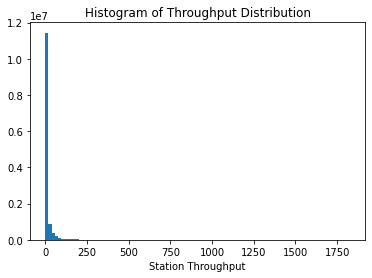

In [28]:
plt.hist(df['Throughput'], bins = 100)
plt.xlabel('Station Throughput')
plt.title('Histogram of Throughput Distribution')
plt.show()

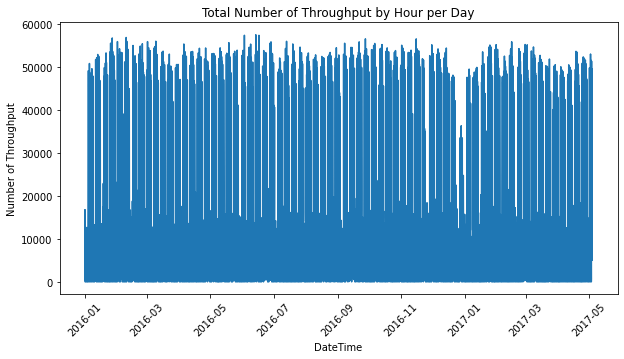

In [29]:
total_throughput = df.groupby('DateTime')['Throughput'].sum().reset_index()

plt.figure(figsize = (10, 5))
plt.plot(total_throughput['DateTime'], total_throughput['Throughput'])
plt.title('Total Number of Throughput by Hour per Day')
plt.xlabel('DateTime')
plt.xticks(rotation = 45)
plt.ylabel('Number of Throughput')
plt.show();

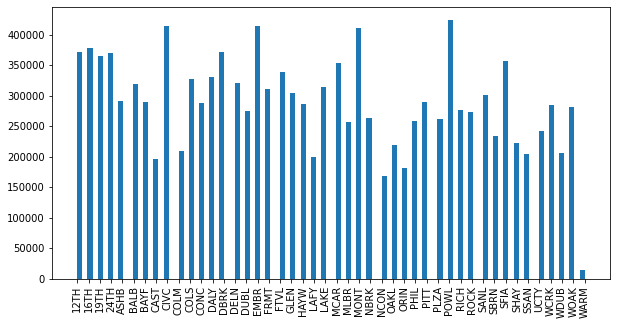

In [30]:
#Histogram of frequencies of station origins
plt.figure(figsize = (10, 5))
plt.hist(df['Origin'], bins = 100)
plt.xticks(rotation = 90)
plt.show();

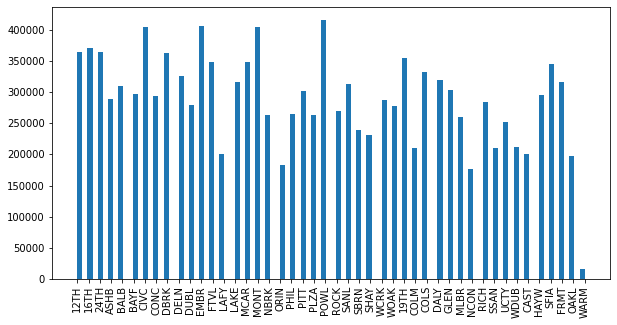

In [31]:
#Histogram of frequencies of station destination
plt.figure(figsize = (10, 5))
plt.hist(df['Destination'], bins = 100)
plt.xticks(rotation = 90)
plt.show();

### Data Analytics Question #1

Which BART station is the busiest?

In [32]:
#Viewing the number of unique values in column Throughput and the data that has the highest number of throughput
print('the number of unique values is: ', df['Throughput'].nunique())
df[df['Throughput'] == df['Throughput'].max()]

the number of unique values is:  950


,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City
10504519,24TH,CIVC,1826,2017-01-21 16:00:00,24th St. Mission (24TH),-122.418143,37.752470,San Francisco,Civic Center/UN Plaza (CIVC),-122.414123,37.779732,San Francisco


In [33]:
#Start by grouping by the sum of throughputs by station for Origins and Destinations
origin = df.groupby(['Origin'])['Throughput'].sum().sort_values(ascending = False)
destination = df.groupby(['Destination'])['Throughput'].sum().sort_values(ascending = False)

In [34]:
#Turning the groupby's into dataframes
origin_station = pd.DataFrame(data = origin)
destination_station = pd.DataFrame(data = destination)

In [35]:
#Built a dataframe that merged both groupby's dataframes
busy_station = origin_station.merge(destination_station, how = 'left', left_index = True, right_index = True).reset_index()
busy_station.rename(columns = {'Origin': 'Station', 'Throughput_x': 'Origin_Throughput', 'Throughput_y': 'Dest_Throughput'},
                    inplace = True)
busy_station.head()

,Station,Origin_Throughput,Dest_Throughput
0,MONT,16107314,16956581
1,EMBR,15749457,18327187
2,POWL,14138322,12454717
3,CIVC,10145110,9391593
4,24TH,5459492,5303096


In [36]:
#Summed throughputs from both Origin and Destination for a total number of throughputs and printed the station with 
#the highest sum of throughputs
busy_station['Sum_Throughput'] = busy_station['Origin_Throughput'] + busy_station['Dest_Throughput']
busy_station[busy_station['Sum_Throughput'] == busy_station['Sum_Throughput'].max()]

,Station,Origin_Throughput,Dest_Throughput,Sum_Throughput
1,EMBR,15749457,18327187,34076644


Station EMBR is the busiest station.

### Data Anlytics Question #2

What is the least popular station?

In [37]:
#Least popular BART station
busy_station[busy_station['Sum_Throughput'] == busy_station['Sum_Throughput'].min()]

,Station,Origin_Throughput,Dest_Throughput,Sum_Throughput
45,WARM,81397,82112,163509


WARM station is the least popular station.

### Data Analytics Question #3

What is the best time to go to SF from Berkeley if you want to find a seat?

In [38]:
#Setting attributes for Date and Time
df['Time'] = df['DateTime'].apply(lambda x: x.strftime("%H:%M:%S"))
df['Date'] = df['DateTime'].apply(lambda x: x.date())

In [39]:
#Selecting data where the Origin City is Berkeley and Destination City is San Francisco
Berkeley_SF = df[(df['Ori_City'] == ' Berkeley ') & (df['Dest_ City'] == ' San Francisco ')]
Berkeley_SF.head()

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Time,Date
134,ASHB,16TH,4,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,16th St. Mission (16TH),-122.419694,37.765062,San Francisco,00:00:00,2016-01-01
136,ASHB,CIVC,2,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Civic Center/UN Plaza (CIVC),-122.414123,37.779732,San Francisco,00:00:00,2016-01-01
140,ASHB,EMBR,1,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Embarcadero (EMBR),-122.397020,37.792874,San Francisco,00:00:00,2016-01-01
143,ASHB,MONT,1,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,Montgomery St. (MONT),-122.401066,37.789405,San Francisco,00:00:00,2016-01-01
145,ASHB,SFIA,1,2016-01-01,Ashby (ASHB),-122.270062,37.852803,Berkeley,San Francisco Int'l Airport (SFIA),-122.392409,37.615966,San Francisco,00:00:00,2016-01-01


In [40]:
Berkeley_SF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232340 entries, 134 to 13284899
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Origin          232340 non-null  object        
 1   Destination     232340 non-null  object        
 2   Throughput      232340 non-null  int64         
 3   DateTime        232340 non-null  datetime64[ns]
 4   Ori_Name        232340 non-null  object        
 5   Ori_Latitude    232340 non-null  object        
 6   Ori_Longitude   232340 non-null  object        
 7   Ori_City        232340 non-null  object        
 8   Dest_Name       232340 non-null  object        
 9   Dest_Latitude   232340 non-null  object        
 10  Dest_Longitude  232340 non-null  object        
 11  Dest_ City      232340 non-null  object        
 12  Time            232340 non-null  object        
 13  Date            232340 non-null  object        
dtypes: datetime64[ns](1), int64(1), 

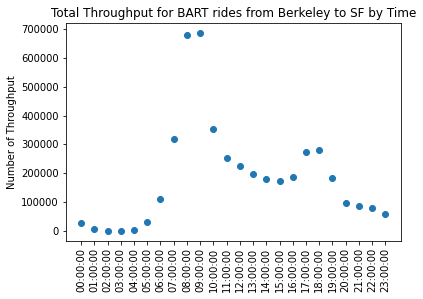

In [41]:
#Plotting the number of Throughputs at each time
plt.plot_date(Berkeley_SF.groupby('Time')['Throughput'].sum().reset_index()['Time'], 
              Berkeley_SF.groupby('Time')['Throughput'].sum().reset_index()['Throughput'])
plt.ylabel('Number of Throughput')
plt.title('Total Throughput for BART rides from Berkeley to SF by Time')
plt.xticks(rotation = 90)
plt.show();

In [42]:
#Grouped by data with Time, Origin Name, and Destination Name with the summed Throughput
Berkeley_SF = Berkeley_SF.groupby(['Time', 'Ori_Name', 'Dest_Name'])['Throughput'].sum().reset_index()

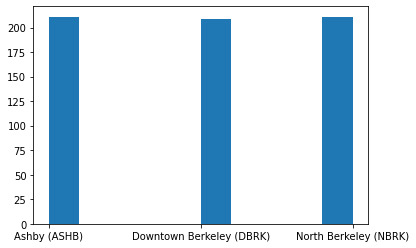

In [43]:
#Histogram all of the number of times train rides leave each Berkeley stations to SF
plt.hist(Berkeley_SF['Ori_Name'])
plt.show();

In [44]:
Berkeley_SF['Ori_Name'].value_counts()

North Berkeley (NBRK)       211
Ashby (ASHB)                211
Downtown Berkeley (DBRK)    209
Name: Ori_Name, dtype: int64

In [45]:
#Grouping the data by Time and Throughput now and divided Throughput by the total numbers of train leaving Berkeley to SF
Berkeley_SF = Berkeley_SF.groupby('Time')['Throughput'].sum().reset_index()
Berkeley_SF['Throughput'] = Berkeley_SF['Throughput']/(188+188+186)

In [46]:
Berkeley_SF

,Time,Throughput
0,00:00:00,49.201068
1,01:00:00,9.528470
2,02:00:00,0.224199
3,03:00:00,0.094306
4,04:00:00,6.779359
5,05:00:00,54.309609
6,06:00:00,198.524911
7,07:00:00,570.040925
8,08:00:00,1210.587189
9,09:00:00,1222.807829


To simplify the data to answer which time is best to travel from Berkeley to SF is to group the data by Time and summing up the number of throughput. This method disregards the affect of day and Station has on the number of riders by the hour. 

There are about 3 to 10 cars per train. Each car has an average of 58 seats. For simplicity, we will assume that most trains have the average of 6 cars from Berkeley to SF; therefore, giving us a total of 348 seats per train. With these numbers in mind, the best time to take BART from Berkeley to SF would be any time that is outside of 7am to 11am and 7pm to 8pm.

*Note: The table above shows that the trains are not operating between 1am to 4am with an average of 8 people leaving the trains at 1am and about 6 people entering the trains 4am. According to BART's FAQ, the trains are down for 2-3 hours for maintenance services (https://www.bart.gov/guide/faq#late_night).

### Data Analytics Question #4

What is the busiest day of the week?

In [47]:
import time
import datetime

#Converting Datetime into a tuple
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S').timetuple())

In [48]:
#Day of the week that is busiest
df['WeekDay'] = df['DateTime'].apply(lambda x: x[6])
df['WeekDay'].mode()

0    4
dtype: int64

The most busiest day of the Week is Thursday.

### Data Analytics Question #5

How many people take the BART late at night?

In [49]:
df.head(1)

,Origin,Destination,Throughput,DateTime,Ori_Name,Ori_Latitude,Ori_Longitude,Ori_City,Dest_Name,Dest_Latitude,Dest_Longitude,Dest_ City,Time,Date,WeekDay
0,12TH,12TH,1,"(2016, 1, 1, 0, 0, 0, 4, 1, -1)",12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,12th St. Oakland City Center (12TH),-122.271450,37.803768,Oakland,00:00:00,2016-01-01,4


In [50]:
#DataFrame for the number of people taking the BART late at night (11pm - 3am)
late = df.loc[(df['Time'] <= "3:00:00") | (df['Time'] == "23:00:00")]
print( 'The average number of people taking the BART late at night is: ', late.groupby('Time')['Throughput'].mean().sum())

The average number of people taking the BART late at night is:  264.6441116397239


In [51]:
#Turning DateTime into timestamp
df['DateTime'] = df['DateTime'].apply(lambda x: time.mktime(x))

### Data Science Question A

Compute a straight line distance between every station.

In [52]:
#Setting the latitudes and longitudes data type form object to floats
df['Ori_Latitude'] = df['Ori_Latitude'].astype('float')
df['Ori_Longitude'] = df['Ori_Longitude'].astype('float')
df['Dest_Latitude'] = df['Dest_Latitude'].astype('float')
df['Dest_Longitude'] = df['Dest_Longitude'].astype('float')

In [53]:
#Calculating the euclidean distances between every station
df['Distance'] = ((df['Ori_Latitude']-df['Dest_Latitude'])**2 + (df['Ori_Longitude']-df['Dest_Longitude'])**2)**(1/2)

In [54]:
#Dataframe displaying the distances between each station
distances = df[['Origin', 'Destination', 'Distance']]
distances.drop_duplicates(inplace = True)
distances

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Origin,Destination,Distance
0,12TH,12TH,0.000000
1,12TH,16TH,0.153214
2,12TH,24TH,0.155404
3,12TH,ASHB,0.049055
4,12TH,BALB,0.194293
...,...,...,...
12220405,WARM,DALY,0.567670
12223976,MLBR,WARM,0.458018
12245264,WARM,SBRN,0.495872
12254087,SBRN,WARM,0.495872


In [55]:
#Checking for duplicates
df.duplicated().sum()

0

In [56]:
#Removing unnecessary attributes
df.drop(['Dest_Name', 'Ori_Name', 'Date', 'Time', 'Ori_City', 'Dest_ City'], axis = 1, inplace = True)

In [57]:
#Removing data, where the origins and destinations were the same station
#df = df[df['Distance'] != 0]

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
#Label the stations in Origin and Destination to numerical values
df['Origin'] = LabelEncoder().fit_transform(df['Origin'])
df['Destination'] = LabelEncoder().fit_transform(df['Destination'])

## Prediction model

In [60]:
#Splitting target from the rest of the data set
y,x = df['Throughput'], df.drop('Throughput', axis = 1)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [62]:
GBR = GradientBoostingRegressor(learning_rate = 0.1, random_state = 0, n_estimators=300)
RFR = RandomForestRegressor(n_estimators = 100, max_depth = 3, random_state = 0)

In [63]:
#Splitting 20% of data set for test set from the training set
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [64]:
#Splitting 20% of the remaining training set for validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.2, random_state = 42)

In [65]:
#Making predictions
algorithms = [RFR, GBR]
reg_type = ['RFR', 'GBR']

def regressions():
    RMSE = []
    R2 = []
    y_pred = []
    
    for i in range(len(algorithms)):
        y_pred = (algorithms[i].fit(x_train, y_train).predict(x_val))
        RMSE.append((mean_squared_error(y_val, y_pred))**0.5)
        R2.append(r2_score(y_val, y_pred)) 

    metrics = pd.DataFrame(columns = ['RMSE', 'R2'], index = reg_type)
    metrics['RMSE'] = RMSE
    metrics['R2'] = R2  
    return metrics

In [66]:
regressions()

,RMSE,R2
RFR,31.099198,0.137195
GBR,29.016705,0.248878


In [67]:
#Predicting the results for test set with RMSE as the precision metric
y_pred = GBR.predict(x_test)
r2_score(y_test, y_pred)

0.24997456514952765